In [61]:
import cv2 as cv

In [62]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="ZEWEc1ZPB3XNtTHuMvf2"
)

result = CLIENT.infer("dataset-rotated/Default_Test/TPS_552.jpg", model_id="kertas-suara/2")

result

{'inference_id': '90ea3cd4-d9a5-44ce-a3e8-15604a89c409',
 'time': 0.03345133399943734,
 'image': {'width': 245, 'height': 288},
 'predictions': [{'x': 233.0,
   'y': 210.0,
   'width': 14.0,
   'height': 12.0,
   'confidence': 0.8610703349113464,
   'class': '1',
   'class_id': 1,
   'detection_id': 'ffbd594a-31ab-454d-bfb0-a13ac1c5e59b'},
  {'x': 200.5,
   'y': 23.5,
   'width': 15.0,
   'height': 13.0,
   'confidence': 0.8545836210250854,
   'class': 'x',
   'class_id': 10,
   'detection_id': '61b9dc2c-f455-4c47-a9fe-ba09a41cfdf7'},
  {'x': 200.0,
   'y': 118.0,
   'width': 14.0,
   'height': 12.0,
   'confidence': 0.8538038730621338,
   'class': '1',
   'class_id': 1,
   'detection_id': '929dfeb8-7ac9-4f9c-8cb7-fd22ae0e7aa2'},
  {'x': 200.5,
   'y': 209.5,
   'width': 15.0,
   'height': 13.0,
   'confidence': 0.8014042377471924,
   'class': 'x',
   'class_id': 10,
   'detection_id': '68fa80bb-a9b9-4111-88ca-436fd94fe870'},
  {'x': 233.0,
   'y': 23.5,
   'width': 14.0,
   'height': 

In [63]:
print(len(result['predictions']))

9


In [64]:
img = cv.imread("dataset-rotated/Default_Test/TPS_552.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [65]:
from functools import cmp_to_key
pred = result['predictions']

def compare(a, b):
    return 1 if (a['x'] + a['y']) > (b['x'] + b['y']) else -1

pred = sorted(pred, key=cmp_to_key(compare))
pred

[{'x': 200.5,
  'y': 23.5,
  'width': 15.0,
  'height': 13.0,
  'confidence': 0.8545836210250854,
  'class': 'x',
  'class_id': 10,
  'detection_id': '61b9dc2c-f455-4c47-a9fe-ba09a41cfdf7'},
 {'x': 217.5,
  'y': 24.0,
  'width': 13.0,
  'height': 12.0,
  'confidence': 0.7283280491828918,
  'class': '2',
  'class_id': 2,
  'detection_id': '44b3af78-6dee-4e9c-87d4-ffc94573e9ac'},
 {'x': 233.0,
  'y': 23.5,
  'width': 14.0,
  'height': 13.0,
  'confidence': 0.7705768346786499,
  'class': 'x',
  'class_id': 10,
  'detection_id': '72e14538-d1fe-4f21-908b-dfca97bbfbd5'},
 {'x': 200.0,
  'y': 118.0,
  'width': 14.0,
  'height': 12.0,
  'confidence': 0.8538038730621338,
  'class': '1',
  'class_id': 1,
  'detection_id': '929dfeb8-7ac9-4f9c-8cb7-fd22ae0e7aa2'},
 {'x': 217.0,
  'y': 117.5,
  'width': 14.0,
  'height': 13.0,
  'confidence': 0.45608991384506226,
  'class': '2',
  'class_id': 2,
  'detection_id': '0ed87c2e-ac01-409f-8539-1dd5416d2054'},
 {'x': 233.0,
  'y': 117.5,
  'width': 14.0,


In [66]:
cropped_imgs = []
for res in pred:
    cropped_imgs.append(img[int(res['y'] - (res['height']/2)): int(res['y'] + (res['height']/2)), 
                            int(res['x'] - (res['width']/2)) : int(res['x'] + (res['width']/2))])

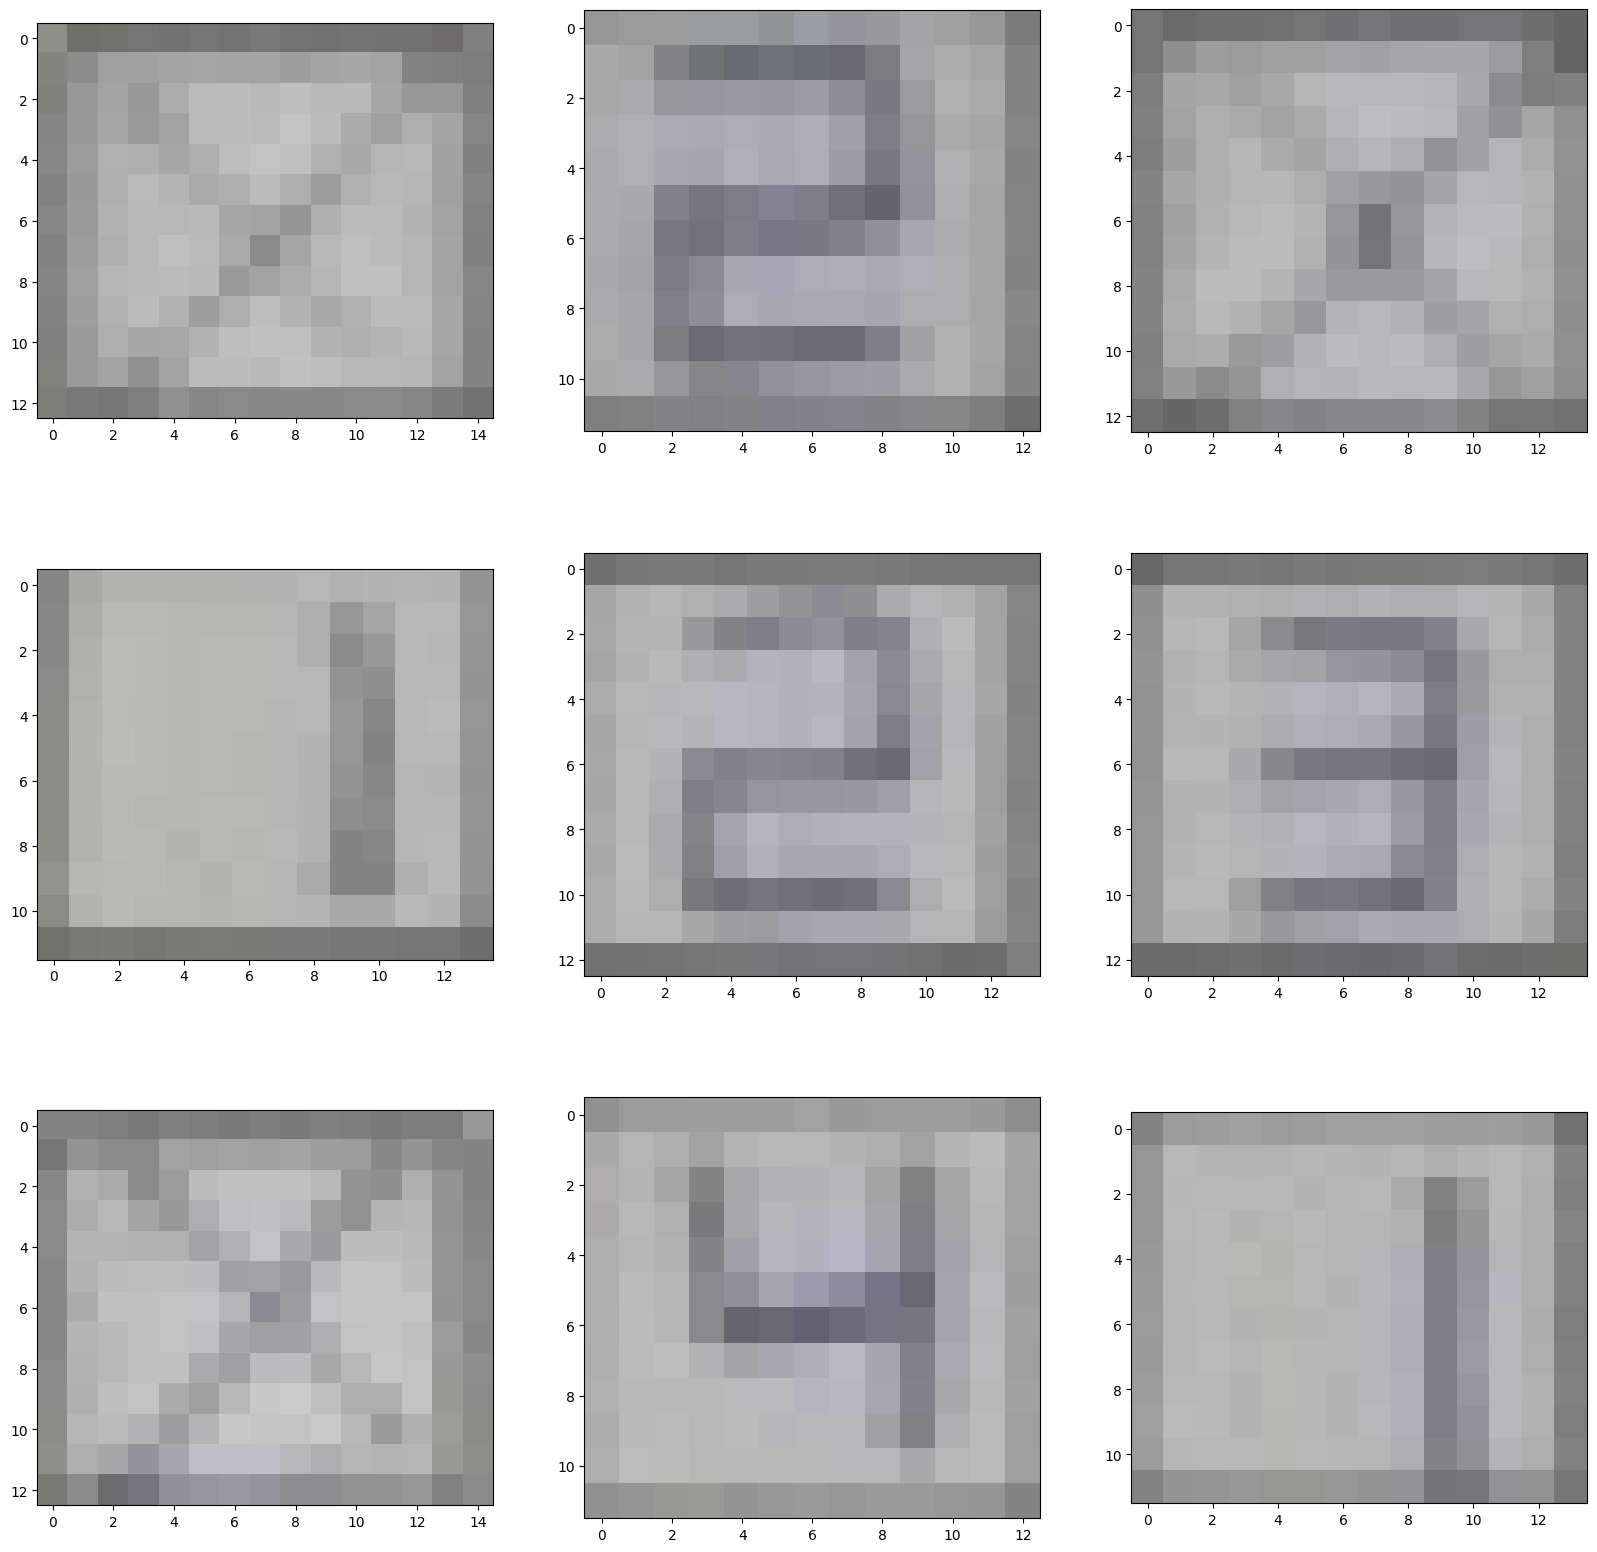

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
for i, cImg in enumerate(cropped_imgs):
    plt.subplot(3, 3, i+1)
    plt.imshow(cropped_imgs[i])

plt.show()

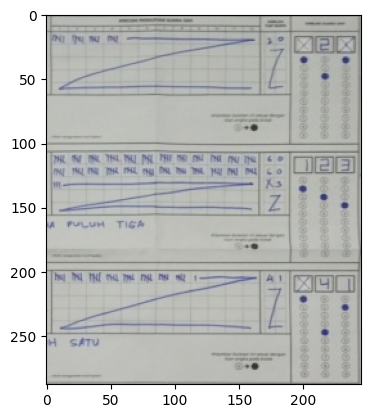

In [68]:
plt.imshow(img)